In [3]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [4]:
#Mount drive and create dataframe

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Manchester 2018-01-01 to 2025-03-31.csv'
df = pd.read_csv(file_path)
df = df[['datetime', 'feelslike', 'precip']]
df = df.rename(columns={'datetime': 'date', 'feelslike': 'temp', 'precip': 'rain'})
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.asfreq('D')
df = df.sort_index()
df.head()

Mounted at /content/drive


,temp,rain
date,,
2018-01-01,1.6,6.530
2018-01-02,2.1,2.964
2018-01-03,3.2,6.946
2018-01-04,3.3,2.407
2018-01-05,1.2,1.703


temp    0
rain    0
dtype: int64
temp    float64
rain    float64
dtype: object


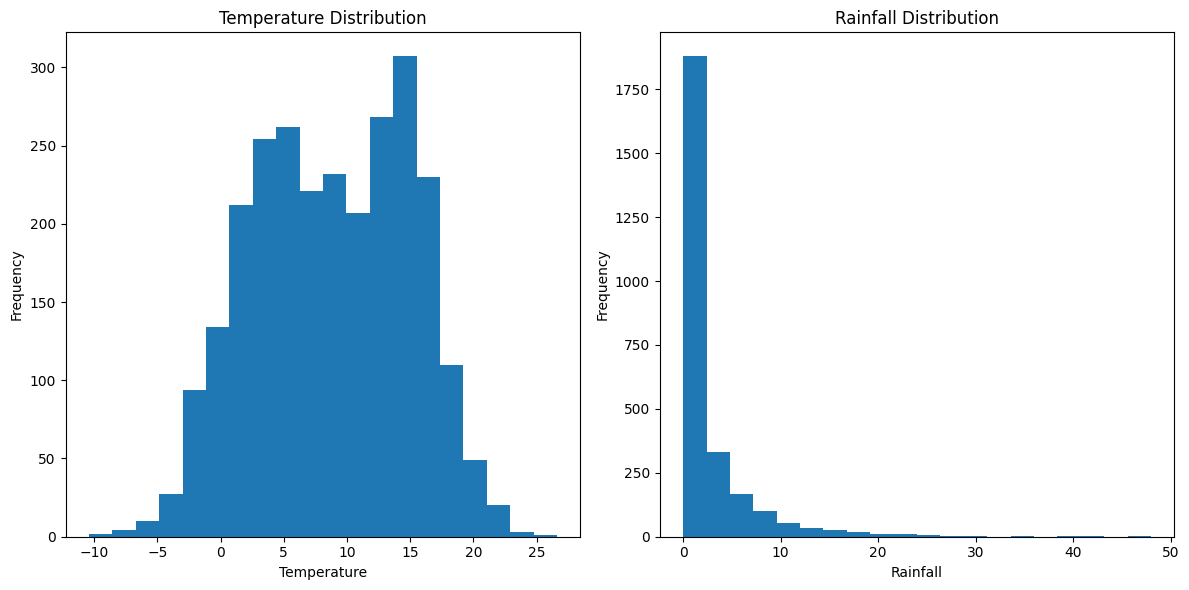

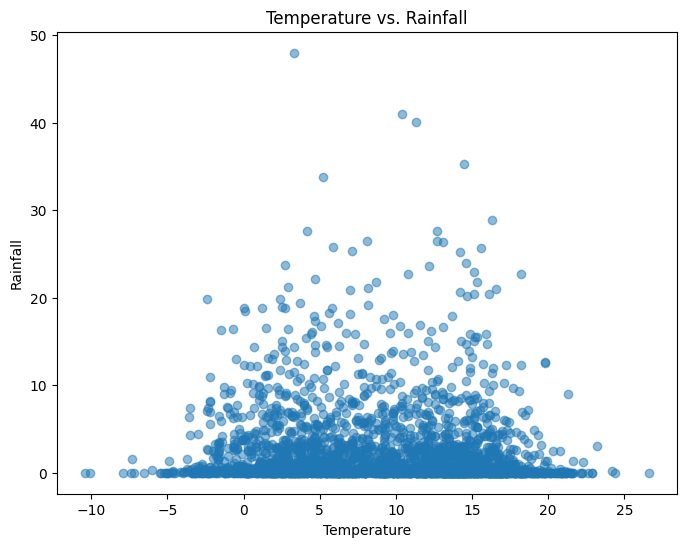

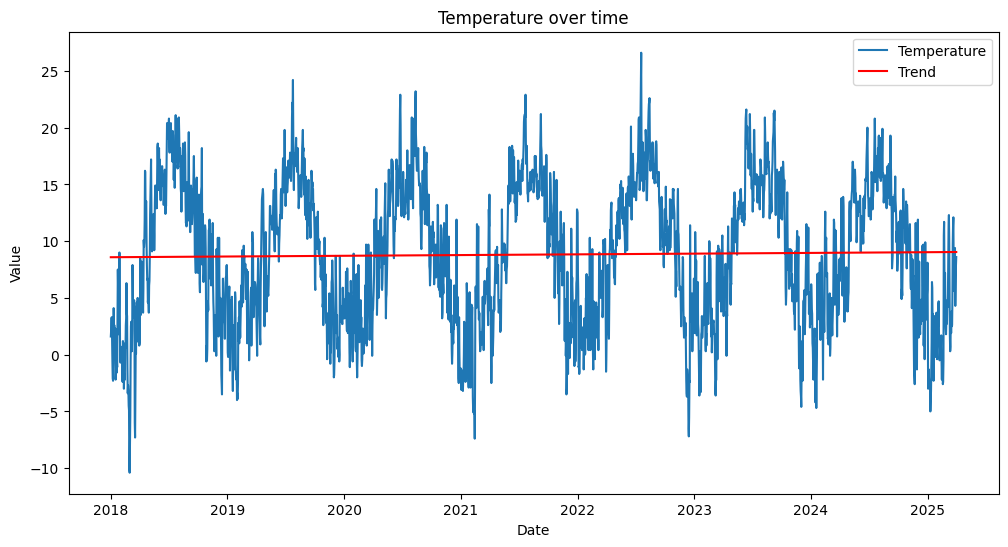

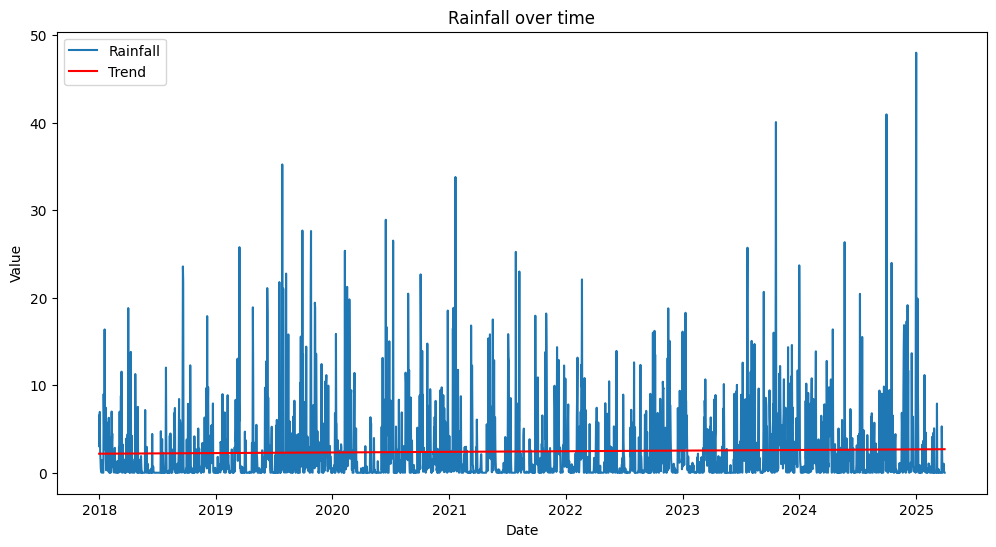

              temp         rain
count  2647.000000  2647.000000
mean      8.813298     2.430108
std       6.185160     4.405427
min     -10.400000     0.000000
25%       3.800000     0.015000
50%       9.000000     0.484000
75%      14.000000     2.889500
max      26.600000    47.992000
          temp      rain
temp  1.000000 -0.039941
rain -0.039941  1.000000


,temp,rain
date,,
2018-01-01,1.6,6.530
2018-01-02,2.1,2.964
2018-01-03,3.2,6.946
2018-01-04,3.3,2.407
2018-01-05,1.2,1.703


In [5]:
import numpy as np

# Check for missing values
print(df.isnull().sum())

#Check data types
print(df.dtypes)

# Explore the distribution of numerical features
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['temp'], bins=20)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['rain'], bins=20)
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Analyze the relationship between temperature and rainfall
plt.figure(figsize=(8, 6))
plt.scatter(df['temp'], df['rain'], alpha=0.5)
plt.title('Temperature vs. Rainfall')
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.show()

# Time series analysis of temperature
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temp'], label='Temperature')
# Calculate trend line using numpy.polyfit()
z = np.polyfit(range(len(df.index)), df['temp'], 1)
p = np.poly1d(z)
# Plot trend line
plt.plot(df.index, p(range(len(df.index))), color='red', label='Trend')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Temperature over time")
plt.legend()
plt.show()

# Time series analysis of rainfall
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rain'], label='Rainfall')
# Calculate trend line using numpy.polyfit()
z = np.polyfit(range(len(df.index)), df['rain'], 1)
p = np.poly1d(z)
# Plot trend line
plt.plot(df.index, p(range(len(df.index))), color='red', label='Trend')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Rainfall over time")
plt.legend()
plt.show()

# Summary statistics
print(df.describe())

# Correlation matrix
print(df[['temp', 'rain']].corr())

df.head()

In [6]:
# check for stationarity augmented dicky-fuller test https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test for temperature
result_temp = adfuller(df['temp'])
print(f"ADF Statistic Temp (Original): {result_temp[0]:.4f}")
print(f"p-value Temp (Original): {result_temp[1]:.4f}")

if result_temp[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")


# Augmented Dickey-Fuller test for temperature
result_rain = adfuller(df['rain'])
print(f"ADF Statistic Rain (Original): {result_rain[0]:.4f}")
print(f"p-value Rain (Original): {result_rain[1]:.4f}")

if result_rain[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

# Apply seasonal differencing with a period of 365 days
df['temp_seasonal_diff'] = df['temp'] - df['temp'].shift(365)

# Remove the first 365 rows which will have NaN values after differencing
df = df.iloc[365:]

# Perform the Augmented Dickey-Fuller test on the differenced series
result_seasonal_diff = adfuller(df['temp_seasonal_diff'].dropna())

print(f"ADF Statistic Temp (Seasonal Differenced): {result_seasonal_diff[0]:.4f}")
print(f"p-value Temp (Seasonal Differenced): {result_seasonal_diff[1]:.4f}")

if result_seasonal_diff[1] < 0.05:
    print("Interpretation: The seasonally differenced series is Stationary.")
else:
    print("Interpretation: The seasonally differenced series is Non-Stationary.")
df.head()



ADF Statistic Temp (Original): -3.1337
p-value Temp (Original): 0.0242
Interpretation: The original series is Stationary.

ADF Statistic Rain (Original): -15.6537
p-value Rain (Original): 0.0000
Interpretation: The original series is Stationary.

ADF Statistic Temp (Seasonal Differenced): -14.7441
p-value Temp (Seasonal Differenced): 0.0000
Interpretation: The seasonally differenced series is Stationary.


,temp,rain,temp_seasonal_diff
date,,,
2019-01-01,4.0,0.155,2.4
2019-01-02,0.2,0.000,-1.9
2019-01-03,-0.2,0.000,-3.4
2019-01-04,0.2,0.000,-3.1
2019-01-05,3.1,0.000,1.9


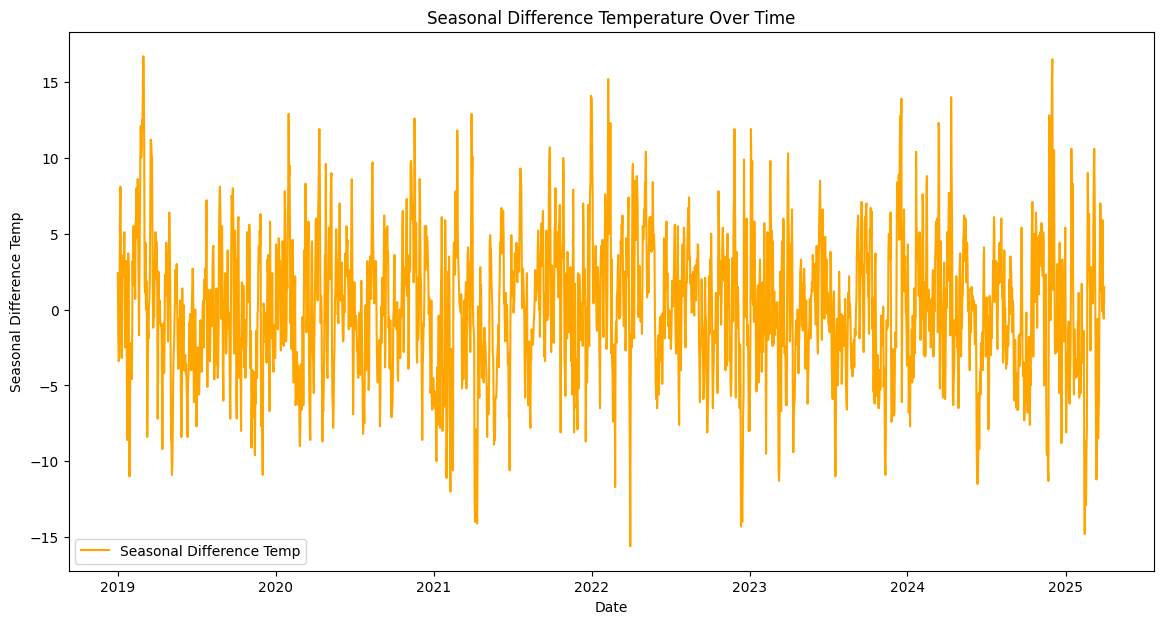

In [7]:
#Plot seasonal temperature difference
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['temp_seasonal_diff'], label='Seasonal Difference Temp', color='orange')
plt.title('Seasonal Difference Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Seasonal Difference Temp')
plt.legend()
plt.show()

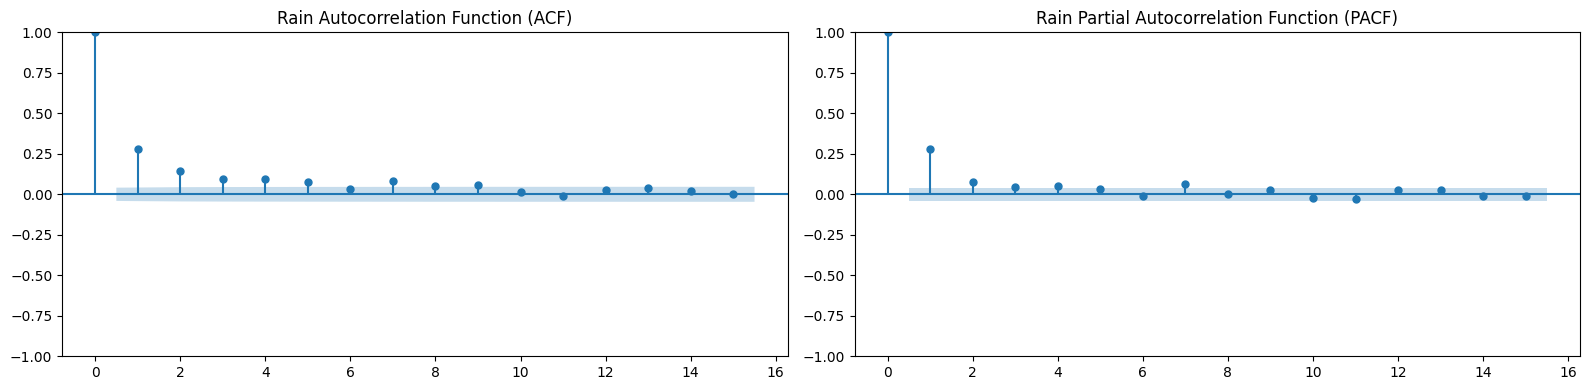

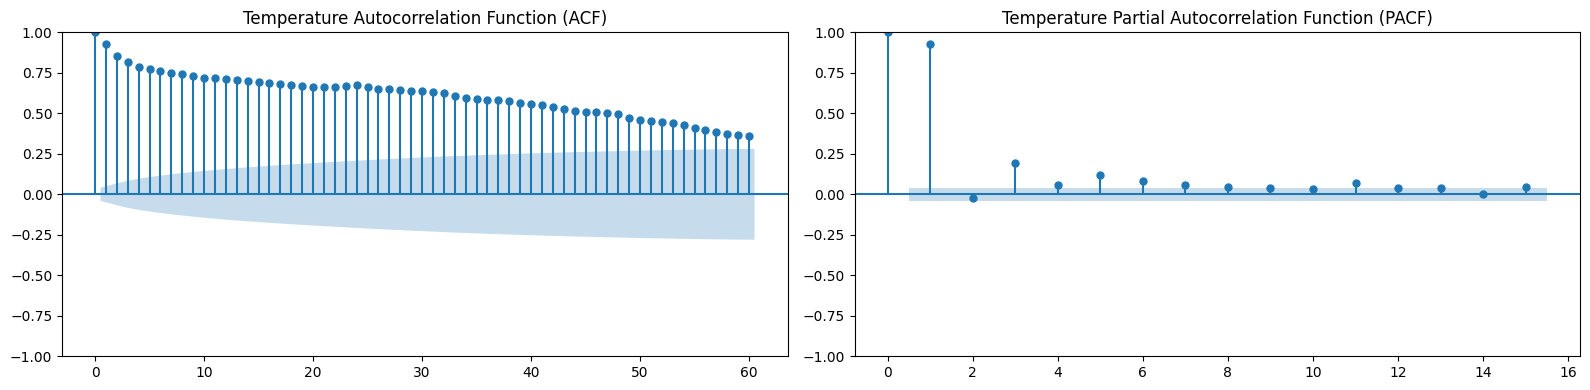

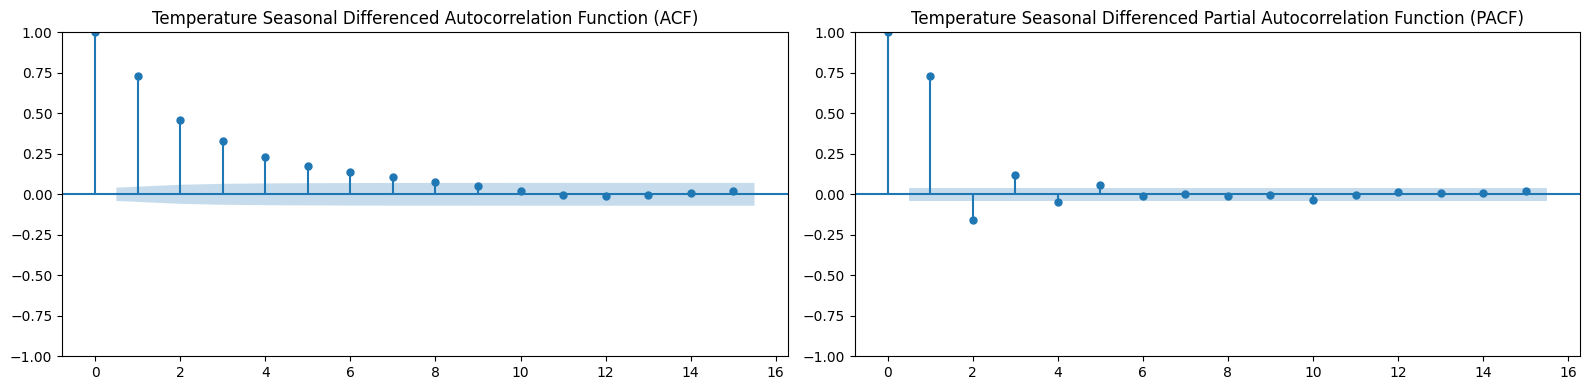

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(df['rain'].dropna(), lags=15, ax=axes[0])
axes[0].set_title('Rain Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['rain'].dropna(), lags=15, ax=axes[1])
axes[1].set_title('Rain Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(df['temp'].dropna(), lags=60, ax=axes[0])
axes[0].set_title('Temperature Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['temp'].dropna(), lags=15, ax=axes[1])
axes[1].set_title('Temperature Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(df['temp_seasonal_diff'].dropna(), lags=15, ax=axes[0])
axes[0].set_title('Temperature Seasonal Differenced Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['temp_seasonal_diff'].dropna(), lags=15, ax=axes[1])
axes[1].set_title('Temperature Seasonal Differenced Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [9]:
from statsmodels.tsa.arima.model import ARIMA
# Split data into train and test
train_sizerain = int(len(df) * 0.8)
trainrain, testrain = df.iloc[:train_sizerain], df.iloc[train_sizerain:]

# Fit ARIMA model
modelrain = ARIMA(trainrain["rain"], order=(1,0,1))
model_fitrain = modelrain.fit()

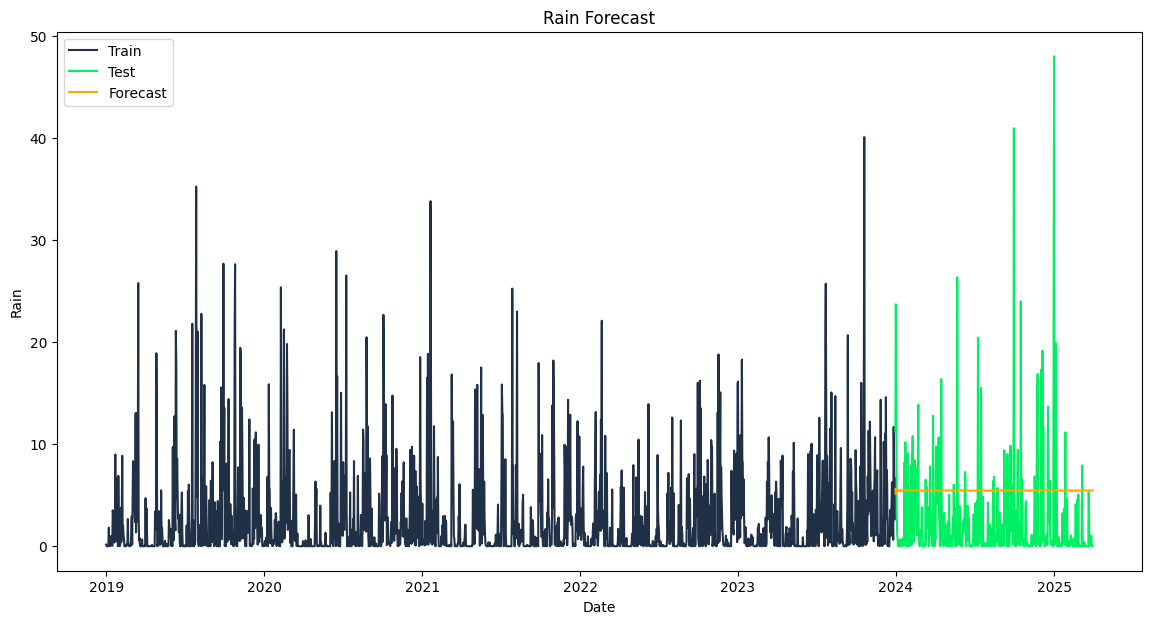

In [10]:
# Forecast
forecastrain = model_fitrain.forecast(steps=len(testrain))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(trainrain.index, trainrain["rain"], label='Train', color='#203147')
plt.plot(testrain.index, testrain["rain"], label='Test', color='#01ef63')
plt.plot(testrain.index, forecastrain, label='Forecast', color='orange')
plt.title('Rain Forecast')
plt.xlabel('Date')
plt.ylabel('Rain')
plt.legend()
plt.show()

In [22]:
import numpy as np
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testrain['rain'], forecastrain))
print(f"RMSE: {rmse}")


RMSE: 5.756558003011834


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Split data into train and test
train_sizetemp = int(len(df) * 0.8)
traintemp, testtemp = df.iloc[:train_sizetemp], df.iloc[train_sizetemp:]

# Fit ARIMA
modeltemp = ARIMA(traintemp["temp"], order=(1, 1, 1))
model_fittemp = modeltemp.fit()

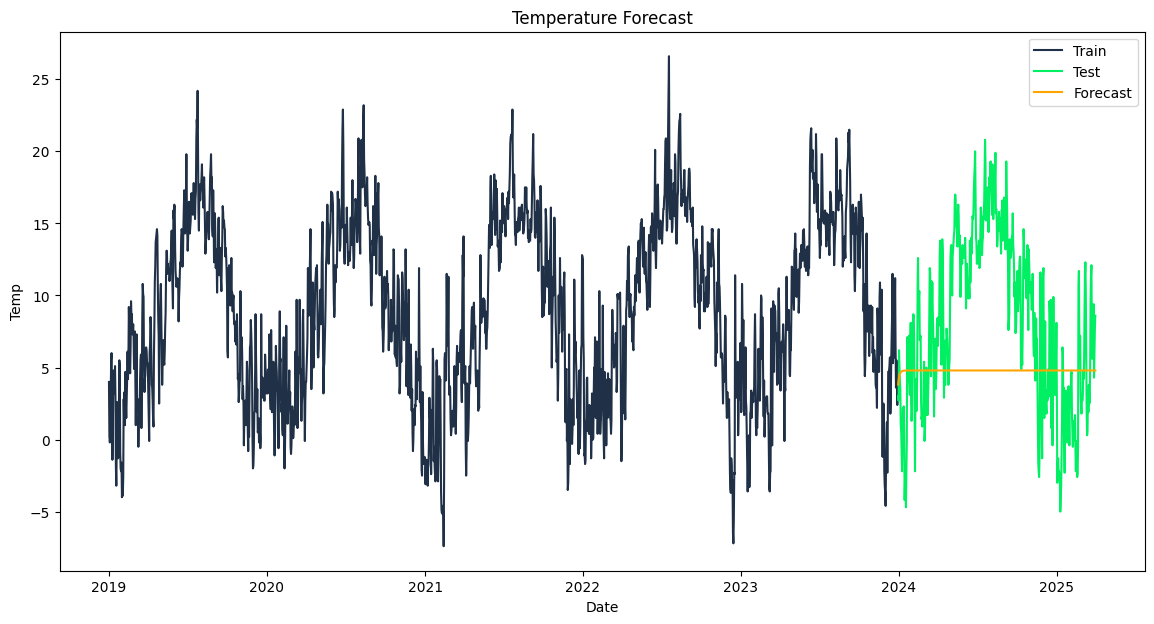

In [12]:
# Forecast
forecasttemp = model_fittemp.forecast(steps=len(testtemp))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(traintemp.index, traintemp["temp"], label='Train', color='#203147')
plt.plot(testtemp.index, testtemp["temp"], label='Test', color='#01ef63')
plt.plot(testtemp.index, forecasttemp, label='Forecast', color='orange')
plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.legend()
plt.show()

In [23]:
import numpy as np
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(testtemp['temp'], forecasttemp))
print(f"RMSE: {rmse}")


RMSE: 6.68991648251714


In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Drop NA values from temp_seasonal_diff in the original DataFrame
df = df.dropna(subset=['temp_seasonal_diff'])

# Split data into train and test
train_sizetemp1 = int(len(df) * 0.8)
traintemp1, testtemp1 = df.iloc[:train_sizetemp1], df.iloc[train_sizetemp1:]

# Fit ARIMA
modeltemp1 = ARIMA(traintemp1["temp_seasonal_diff"], order=(6, 0, 2))
model_fittemp1 = modeltemp1.fit()


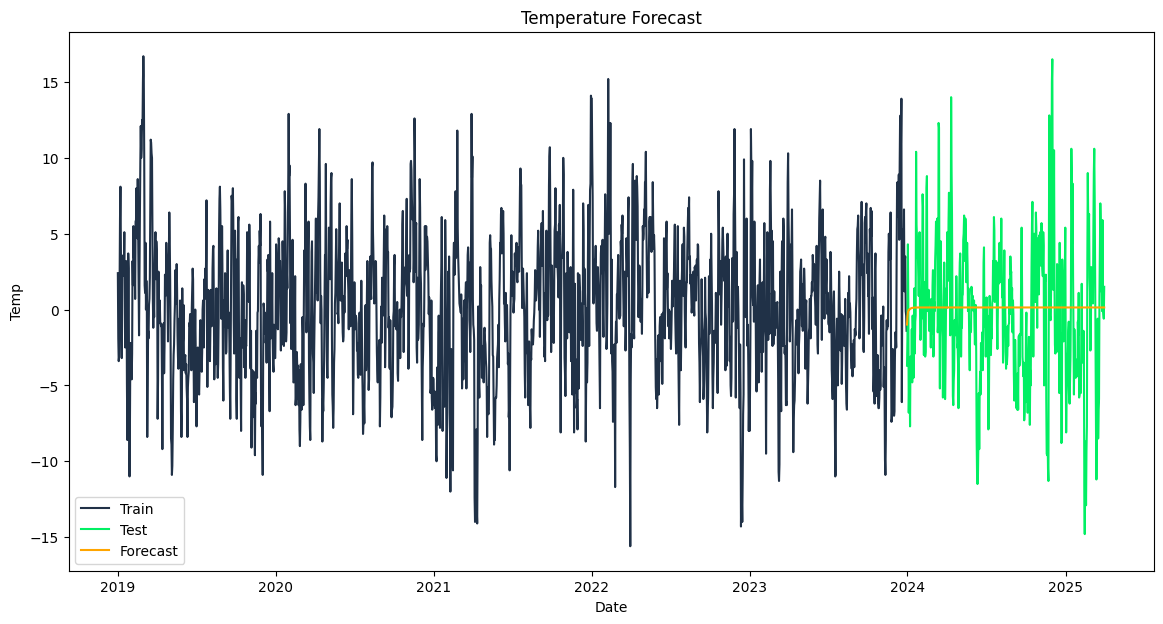

In [19]:
# Forecast
forecasttemp1 = model_fittemp1.forecast(steps=len(testtemp1))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(traintemp1.index, traintemp1["temp_seasonal_diff"], label='Train', color='#203147')
plt.plot(testtemp1.index, testtemp1["temp_seasonal_diff"], label='Test', color='#01ef63')
plt.plot(testtemp1.index, forecasttemp1, label='Forecast', color='orange')
plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.legend()
plt.show()

Mean Squared Error: 30.987415865051343


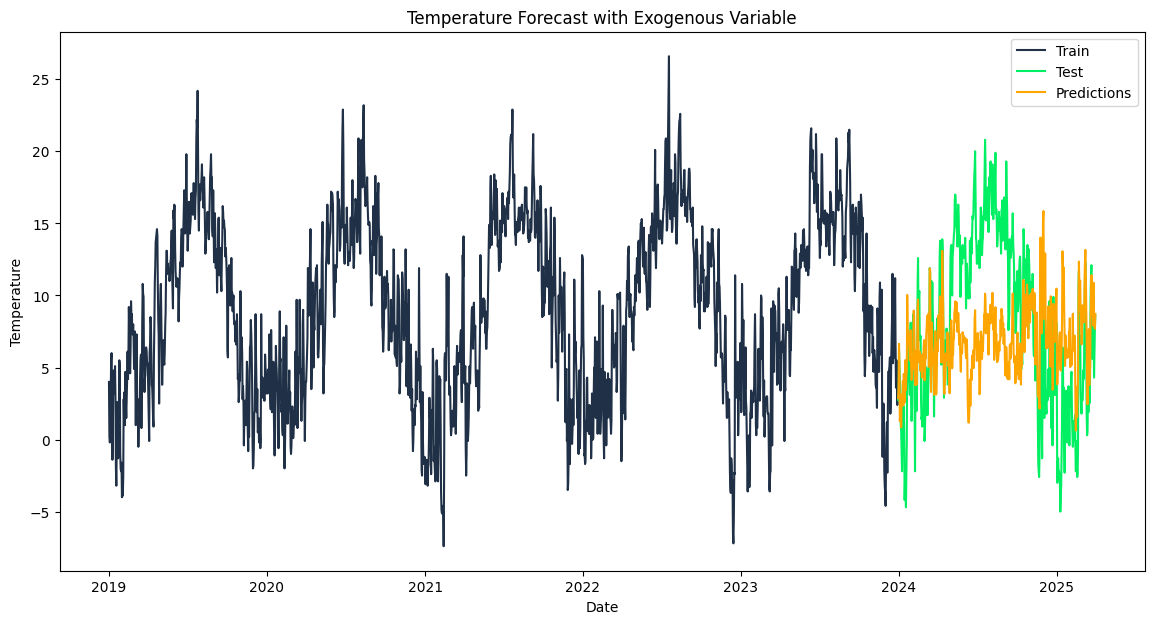

In [20]:


import matplotlib.pyplot as plt

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit the ARIMA model with exogenous variable
model = ARIMA(train["temp"], order=(6, 0, 1), exog=train["temp_seasonal_diff"])
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(df)-1, exog=test["temp_seasonal_diff"])


# Evaluate the model (Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test["temp"], predictions)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train.index, train["temp"], label='Train', color='#203147')
plt.plot(test.index, test["temp"], label='Test', color='#01ef63')
plt.plot(test.index, predictions, label='Predictions', color='orange')
plt.title('Temperature Forecast with Exogenous Variable')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [21]:


from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test["temp"], predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared (R2)
r2 = r2_score(test["temp"], predictions)
print(f"R-squared: {r2}")


Mean Absolute Error: 4.67371679136304
R-squared: 0.08410960271875356


In [18]:


import matplotlib.pyplot as plt


# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train["temp"], order=(1, 0, 1), seasonal_order=(1, 0, 1, 365)) # Use temp_seasonal_diff as exog
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(df)-1) # Provide exog for predictions


# Evaluate the model (Mean Squared Error)
mse = mean_squared_error(test["temp"], predictions)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train.index, train["temp"], label='Train', color='#203147')
plt.plot(test.index, test["temp"], label='Test', color='#01ef63')
plt.plot(test.index, predictions, label='Predictions', color='orange')
plt.title('Temperature Forecast with Seasonal Element')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


KeyboardInterrupt: 